# Objective:
recognize  the fashion object   on Mnist dataset with the help of PCA and GridSearchCV
https://www.kaggle.com/zalando-research/fashionmnist

In [37]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
import random
  
fashion__df = pd.read_csv('fashion-mnist.csv', sep = ',')


fashion__df.head(40)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


0-חולצה
1-מכנסיים
2-סוודר
3-שמלה
4-מעיל
5-סנדל
6-חליפה
7-נעל
8-כובע
9-מגף

In [2]:
fashion__df.shape

(10000, 785)

In [13]:
fashion__df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [2]:
fashion__df.label.value_counts()

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
Name: label, dtype: int64

In [14]:
f = np.array(fashion__df, dtype='float32')
x = f[:,1:]
y = f[:,0]

## 4. Feature Scaling:
Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

### Standardization
In machine learning, we can handle various types of data, e.g. audio signals and pixel values for image data, and this data can include multiple dimensions. Feature standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance. This method is widely used for normalization in many machine learning algorithms (e.g., support vector machines, logistic regression, and neural networks. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values (mean is already subtracted) of each feature by its standard deviation.

## Standard Scaler

##  $$x'= \frac{x - mean(x)}{\sigma}$$


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)


StandardScaler()

In [16]:
x_train_scaler = scaler.transform(x[:,:784 ])


In [7]:
from sklearn import model_selection
seed = 1
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# define scoring method
scoring = 'accuracy'

# Define models to train
names = ["Nearest Neighbors",
         "Decision Tree",
         "Random Forest", 
         #"AdaBoost",
         # "SVM Linear",
        "Logistic Regression"]

classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=5, max_features=5),
   # AdaBoostClassifier(),
   # SVC(kernel = 'linear'), 
    LogisticRegression(n_jobs = -1)

]

models = zip(names, classifiers)

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, x_train_scaler[0:8000 ], y[0:8000 ], cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Nearest Neighbors: 0.817000 (0.020609)
Decision Tree: 0.689625 (0.013288)
Random Forest: 0.714875 (0.018527)
Logistic Regression: 0.804250 (0.012135)


## 5. Dimentionality Reduction
Having too many features in the training set can make the training process extremely slow and makes it unlikely to get a good solution.
In statistics, machine learning, and information theory, dimensionality reduction or dimension reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. It can be divided into feature selection and feature extraction.

## Principal component analysis (PCA)
The main linear technique for dimensionality reduction, principal component analysis, performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized.

### Ploting the relation between the Variance and the Dimensions

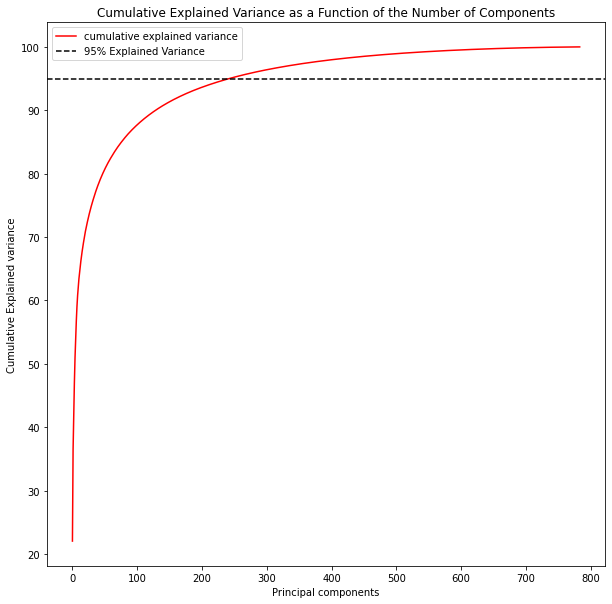

In [6]:
#Using elbow-plot variance/dimensions
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_scaler)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')

This curve quantifies how much of the total, 785-dimensional variance is contained within the first N components. 
For example, we see that  the first 100 components contain approximately 90% of the variance, 
while you need around 600 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance)
and that we'd need about 100 components to retain 90% of the variance.
Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present 
in multiple observations.

In [17]:
from sklearn.decomposition import PCA

pca = PCA(.95) 
pca.fit(x_train_scaler)

x_train_pca = pca.transform(x_train_scaler)



In [18]:
x_train_pca.shape

(10000, 243)

In [19]:
x_test_pca=x_train_pca[8000:10000,:243 ]
x_train_pca=x_train_pca[0:8000,:243 ]


## 6. Comparing the images before and after applying the PCA

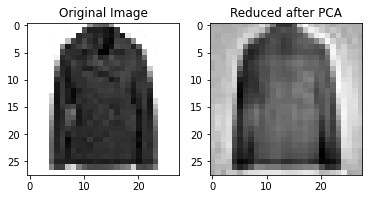

In [10]:
sample = x[60]
sample.shape = (28,28)


a = plt.subplot(1,2,1)
a.set_title('Original Image')
plt.imshow(sample, cmap = plt.cm.gray_r)

sample = pca.inverse_transform(x_train_pca[60])
sample.shape = (28,28)

b = plt.subplot(1,2,2)
b.set_title("Reduced after PCA")
plt.imshow(sample, cmap = plt.cm.gray_r)



In [8]:
from sklearn import model_selection
seed = 1
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# define scoring method
scoring = 'accuracy'

# Define models to train
names = ["Nearest Neighbors",
         "Decision Tree",
         "Random Forest", 
         #"AdaBoost",
         # "SVM Linear",
        "Logistic Regression"]

classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=5, max_features=5),
   # AdaBoostClassifier(),
   # SVC(kernel = 'linear'), 
    LogisticRegression(n_jobs = -1)

]

models = zip(names, classifiers)

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, x_train_pca , y[0:8000 ], cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Nearest Neighbors: 0.823625 (0.017735)
Decision Tree: 0.638000 (0.016204)
Random Forest: 0.477000 (0.037940)
Logistic Regression: 0.820000 (0.010651)


# Logistic Regression tunning

### GridSearch Cross Validation
In machine learning, two tasks are commonly done at the same time in data pipelines: cross validation and (hyper)parameter tuning. Cross validation is the process of training learners using one set of data and testing it using a different set. Parameter tuning is the process to selecting the values for a model’s parameters that maximize the accuracy of the model.

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# making skeletal model
logistic_regression = LogisticRegression(n_jobs = -1)

# Set of parameters we want to try for our Model
#Regularization normally tries to reduce or penalize the complexity of the model.
#Regularization techniques applied with logistic regression mostly tend to penalize large coefficients
parameters = { 'C' : [0.00001,0.01,0.1,0.5,1.1]}

#Running the Model with above chosen parameter
grid_search = GridSearchCV(estimator = logistic_regression, param_grid = parameters , scoring = 'accuracy', cv = 3, n_jobs = -1 , verbose = 2)
grid_scores = grid_search.fit(x_train_pca , y[0:8000 ])


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    6.5s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    8.0s finished


In [40]:
print( grid_search.best_score_)
print(grid_search.best_params_)

0.8391257450658127
{'C': 0.01}


In [41]:
# Making the Final Classification model.
import datetime
logistic_regression = LogisticRegression( C = 0.01, n_jobs = -1)
tick =datetime.datetime.now()
logistic_regression.fit(x_train_pca, y[0:8000 ])
tock=datetime.datetime.now()
lr_train_time = tock - tick
print("Time taken for training a Logistic Regression model = " + str(lr_train_time))


Time taken for training a Logistic Regression model = 0:00:02.505943


## 8. Predicting values on training set

In [42]:
tick=datetime.datetime.now()
lr_train_predict=logistic_regression.predict(x_train_pca)
tock=datetime.datetime.now()
lr_pred_train_time = tock - tick
print('Time taken to predict the data points in the Test set is : ' + str(lr_pred_train_time))

Time taken to predict the data points in the Test set is : 0:00:00.012981


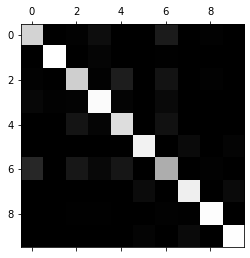

In [43]:
#Making the confusion Matrix

from sklearn.metrics import confusion_matrix
cf= confusion_matrix(y[0:8000 ], lr_train_predict)

# Visualizing the Confusion Matrix`

plt.matshow(cf , cmap = plt.cm.gray, )
plt.show()



### Here the rows represent the ACTUAL CLASS and the columns represent PREDICTED CLASS.
the whiteness across the diagonal shows the high values that Most of the class were predicted correctly.

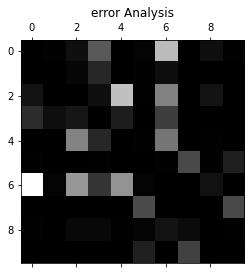

In [31]:
# Analyzing the Errors
row_sums = cf.sum(axis=1 , keepdims = True)
normal_cf = cf/row_sums

np.fill_diagonal(normal_cf,0)
plt.matshow(normal_cf,cmap = plt.cm.gray)

plt.title("error Analysis")
plt.show()



### Looking at the error analysis:

#### most prominent errors are:

$6,0$ and $0,6$

$2,4$ and $4,2$

$6,2$ and $2,6$

$6,4$ and $4,6$



##### That is these values were often misunderstood ,
##### but it should also be noted that the most of the errors are symmetrical.

In [44]:
k = logistic_regression.score(x_train_pca, y[0:8000 ])
print('the Accuracy on the Training set come out to be : ' + str(k))

the Accuracy on the Training set come out to be : 0.86875


### True Positives (TP) - 
These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes. E.g. if actual class value indicates that this passenger survived and predicted class tells you the same thing.

### True Negatives (TN) - 
These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. E.g. if actual class says this passenger did not survive and predicted class tells you the same thing.

False positives and false negatives, these values occur when your actual class contradicts with the predicted class.

### False Positives (FP) –
When actual class is no and predicted class is yes. E.g. if actual class says this passenger did not survive but predicted class tells you that this passenger will survive.

### False Negatives (FN) –
When actual class is yes but predicted class in no. E.g. if actual class value indicates that this passenger survived and predicted class tells you that passenger will die.

Once you understand these four parameters then we can calculate Accuracy, Precision, Recall and F1 score.

### F1 Score
In statistical analysis of binary classification, the F1 score (also F-score or F-measure) is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score: p is the number of correct positive results divided by the number of all positive results returned by the classifier, and r is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive). The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

 ### $$F1 =\frac{2}{\frac{1}{Precision} + \frac{1} {Recall} }$$

In [33]:
import sklearn.metrics as skm
print(skm.classification_report( y[0:8000 ] , lr_train_predict ))

              precision    recall  f1-score   support

         0.0       0.81      0.82      0.81       780
         1.0       0.99      0.96      0.98       798
         2.0       0.80      0.78      0.79       796
         3.0       0.87      0.90      0.88       841
         4.0       0.79      0.83      0.81       801
         5.0       0.93      0.93      0.93       781
         6.0       0.68      0.64      0.66       818
         7.0       0.91      0.91      0.91       787
         8.0       0.97      0.97      0.97       788
         9.0       0.94      0.94      0.94       810

    accuracy                           0.87      8000
   macro avg       0.87      0.87      0.87      8000
weighted avg       0.87      0.87      0.87      8000



In [45]:
k = logistic_regression.score(x_test_pca, y[8000 :10000])
k

0.8525

# knn tunning

In [10]:
#List Hyperparameters that we want to tune.
from sklearn.model_selection import GridSearchCV

n_neighbors = [1,10,20]
p=[1,2]
#Convert to dictionary
hyperparameters = dict( n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x_train_pca, y[0:8000 ])
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 2
Best n_neighbors: 10


In [11]:
print( best_model.best_score_)


0.819875
